In [69]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from math import exp

import numpy as np
import scipy.optimize

In [70]:
from matplotlib import rcParams
params = {
   'axes.labelsize': 14,
   'font.size': 14,
   'legend.fontsize': 10,
   'legend.title_fontsize': 12,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5],
   }
rcParams.update(params)
# sns.set_palette("pastel")

# Prep for Exp

In [71]:
Polynomial = np.polynomial.Polynomial
df = pd.DataFrame()
data = [
    [0, 720],
    [1, 52488],
    [2, 7456106]
]

df = pd.DataFrame(data, columns=["Generation", "Compounds"])

def monoExp(x, a, b):
    return a*np.exp(-b*x)

xs = np.array([0, 1, 2])
ys = np.array([i[1] for i in data])
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, (100, 0))

a, b = params

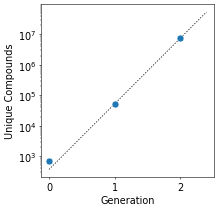

In [72]:
r = 25
pred_df = pd.DataFrame(zip(np.array([i/10 for i in range(r)]), monoExp(np.array([i/10 for i in range(r)]), a, b)), columns=["Generation", "Compounds"])
fig, axs = plt.subplots(1, 1, dpi=50)

lplot = sns.lineplot(x="Generation", y="Compounds", data=pred_df, color='black', style=True, dashes=[(2,2)], linewidth=1, legend=False)
splot = sns.scatterplot(x="Generation", y="Compounds", data=df, ax=axs, s=100, zorder=4)

axs.set_ylabel("Unique Compounds")


axs.set_yscale("log")
axs.set_aspect(1./axs.get_data_ratio())

fig.savefig("../figures/fig_3_exponential_growth.png", bbox_inches="tight")

# Prep For Benchmark

In [73]:
plot_runs = pd.read_csv("../data/benchmark_results.csv")
plot_runs.n_cores = plot_runs.n_cores.apply(str)
plot_runs["run_time_min"] = plot_runs["run_time"].apply(lambda v: v/60)
plot_runs = plot_runs.sort_values(by="n_cores")
plot_runs = plot_runs.rename(columns={"n_cores": "Processes"})
plot_runs["Computer"] = plot_runs.Processes.apply(lambda s: "SC" if "SC" in s else "PC")
plot_runs["Processes"] = plot_runs.Processes.apply(lambda s: s.split(" ")[0])

In [52]:
plot_runs.to_csv("../data/benchmark_results_processed.csv")

# Plot Both With Style

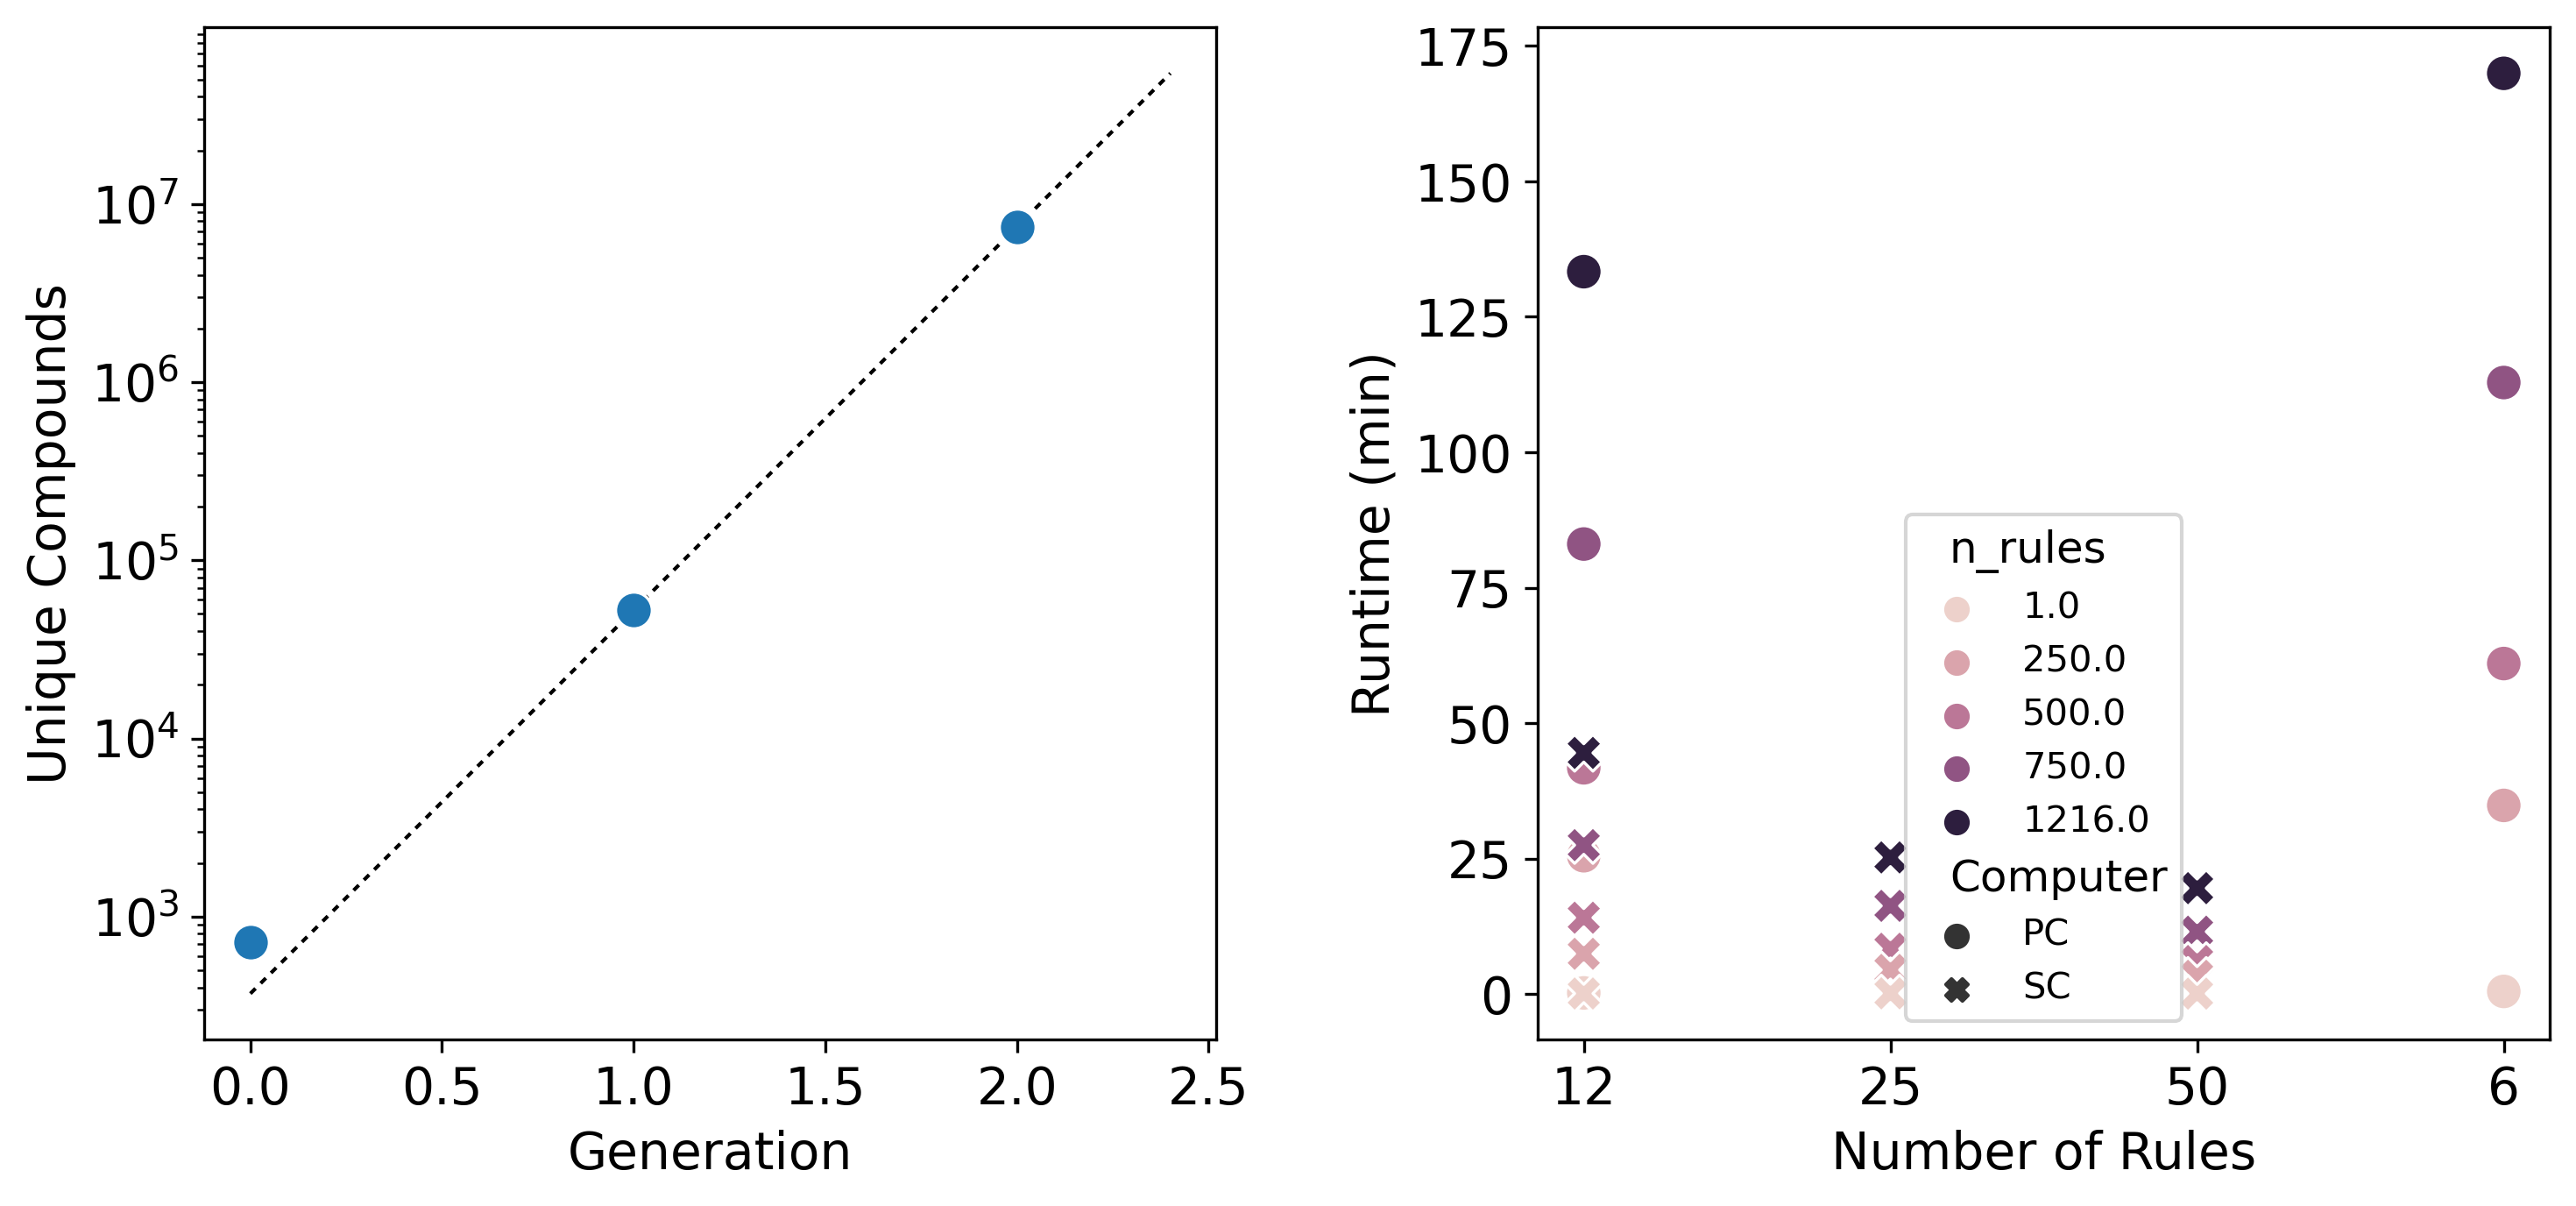

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=300)

# Leftside
r = 25
pred_df = pd.DataFrame(zip(np.array([i/10 for i in range(r)]), monoExp(np.array([i/10 for i in range(r)]), a, b)), columns=["Generation", "Compounds"])
lplot = sns.lineplot(x="Generation", y="Compounds", data=pred_df, ax=axs[0], color='black', style=True, dashes=[(2,2)], linewidth=1, legend=False)
splot = sns.scatterplot(x="Generation", y="Compounds", data=df, ax=axs[0], s=100, zorder=4)

axs[0].set_ylabel("Unique Compounds")

axs[0].set_yscale("log")
axs[0].set_aspect(1./axs[0].get_data_ratio())

# Rightside
g = sns.scatterplot(
    hue="n_rules",
    y="run_time_min",
    data=plot_runs,
    x="Processes",
    s=100,
    ax=axs[1],
    hue_order=["6", "12", "12", "25", "50"],
    style="Computer"
    )


# axs[1].set_yscale("log")
axs[1].set_aspect(1./axs[1].get_data_ratio())
axs[1].set_ylabel("Runtime (min)")
axs[1].set_xlabel("Number of Rules")

fig.savefig("../figures/fig_3_growth_and_benchmark.png", bbox_inches="tight")

In [79]:
plot_runs = pd.read_csv("../data/benchmark_results.csv")
plot_runs.n_cores = plot_runs.n_cores.apply(str)
plot_runs["run_time_min"] = plot_runs["run_time"].apply(lambda v: v/60)
plot_runs = plot_runs.sort_values(by="n_cores")
plot_runs = plot_runs.rename(columns={"n_cores": "Processes"})
# plot_runs["Computer"] = plot_runs.Processes.apply(lambda s: "SC" if "SC" in s else "PC")
# plot_runs["Processes"] = plot_runs.Processes.apply(lambda s: s.split(" ")[0])

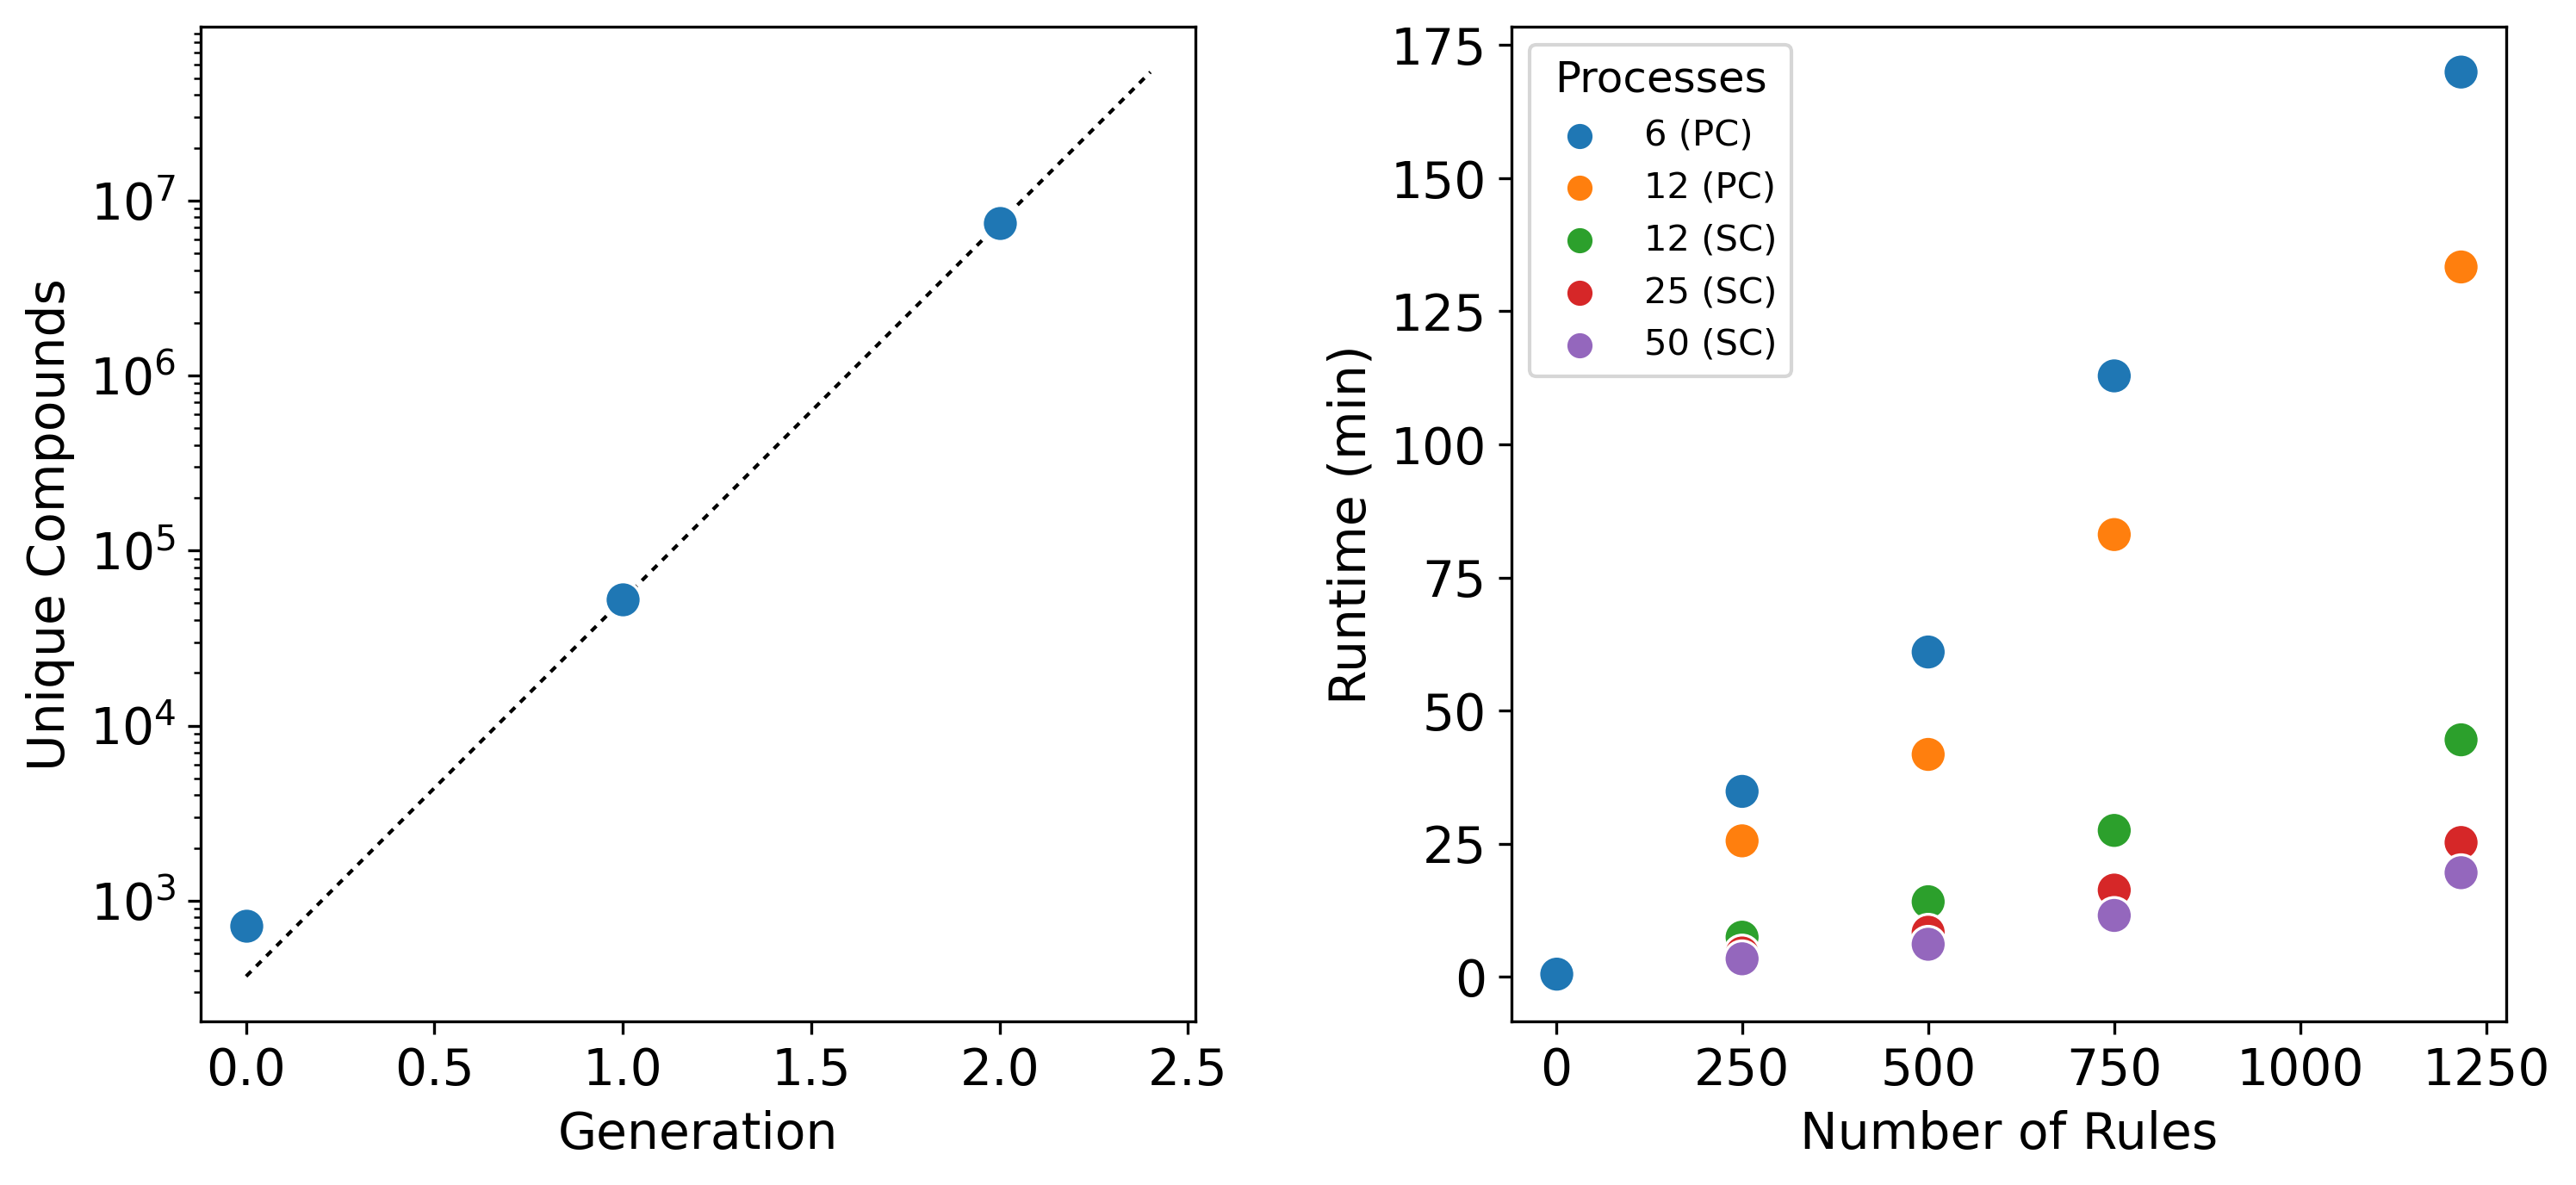

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=300)

# Leftside
r = 25
pred_df = pd.DataFrame(zip(np.array([i/10 for i in range(r)]), monoExp(np.array([i/10 for i in range(r)]), a, b)), columns=["Generation", "Compounds"])
lplot = sns.lineplot(x="Generation", y="Compounds", data=pred_df, ax=axs[0], color='black', style=True, dashes=[(2,2)], linewidth=1, legend=False)
splot = sns.scatterplot(x="Generation", y="Compounds", data=df, ax=axs[0], s=100, zorder=4)

axs[0].set_ylabel("Unique Compounds")

axs[0].set_yscale("log")
axs[0].set_aspect(1./axs[0].get_data_ratio())

# Rightside
g = sns.scatterplot(
    x="n_rules",
    y="run_time_min",
    data=plot_runs,
    hue="Processes",
    s=100,
    ax=axs[1],
    hue_order=["6 (PC)", "12 (PC)", "12 (SC)", "25 (SC)", "50 (SC)"],
)


# axs[1].set_yscale("log")
axs[1].set_aspect(1./axs[1].get_data_ratio())
axs[1].set_ylabel("Runtime (min)")
axs[1].set_xlabel("Number of Rules")

fig.savefig("../figures/fig_3_growth_and_benchmark_nostyle.png", bbox_inches="tight")